<a href="https://colab.research.google.com/github/Boitymellow95/acml-project-loan-prediction-project/blob/musa/Copy_of_loanPredictionProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


Import data to Google Collab

In [ ]:

from google.colab import files
files.upload() 

In [35]:
df = pd.read_csv('LoanData.csv')
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

## Display data frame ##


In [ ]:
display(df)

Make sure Pandas doesn't hide any columns.


In [36]:
pd.set_option("display.max.columns", None)

In [37]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


# Exploratory Analysis #

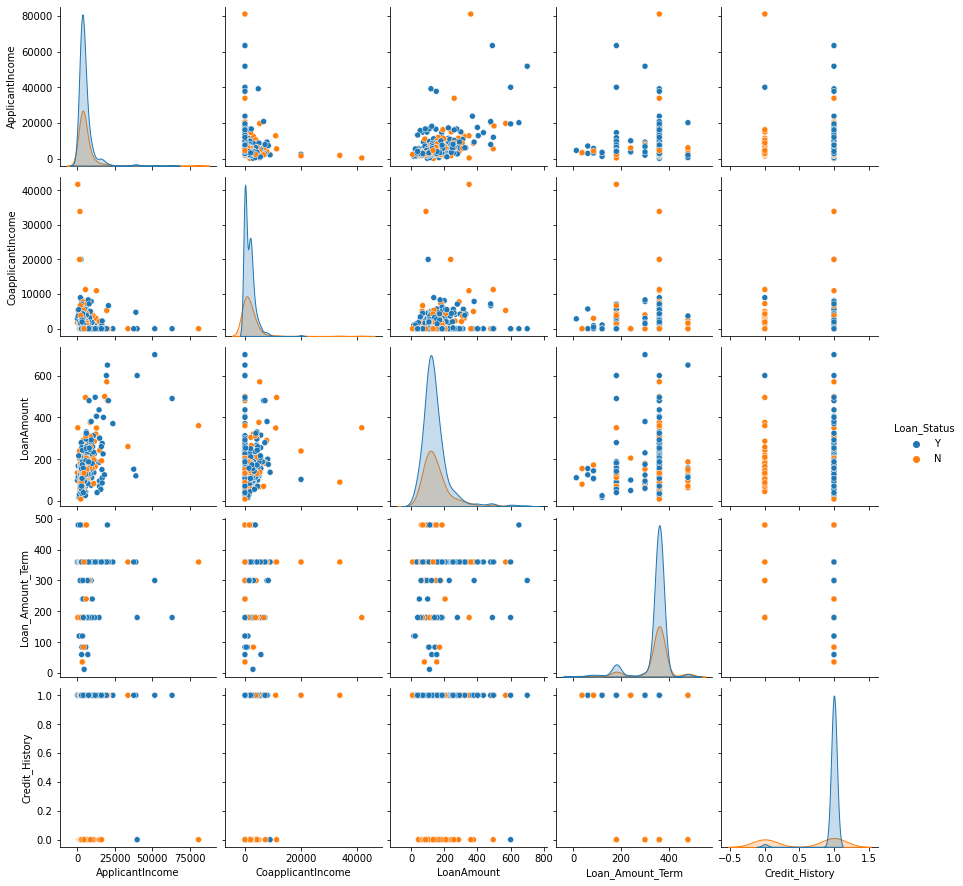

In [38]:
sns.pairplot(df, hue='Loan_Status', height=2.5);


Based on the above graphs - we can see that there is a correlation between loan status and applicant_incomes and co-applicant income.

## 3 Analyze values assigned ##
### 3.1 Analyse Categorical Columns ###

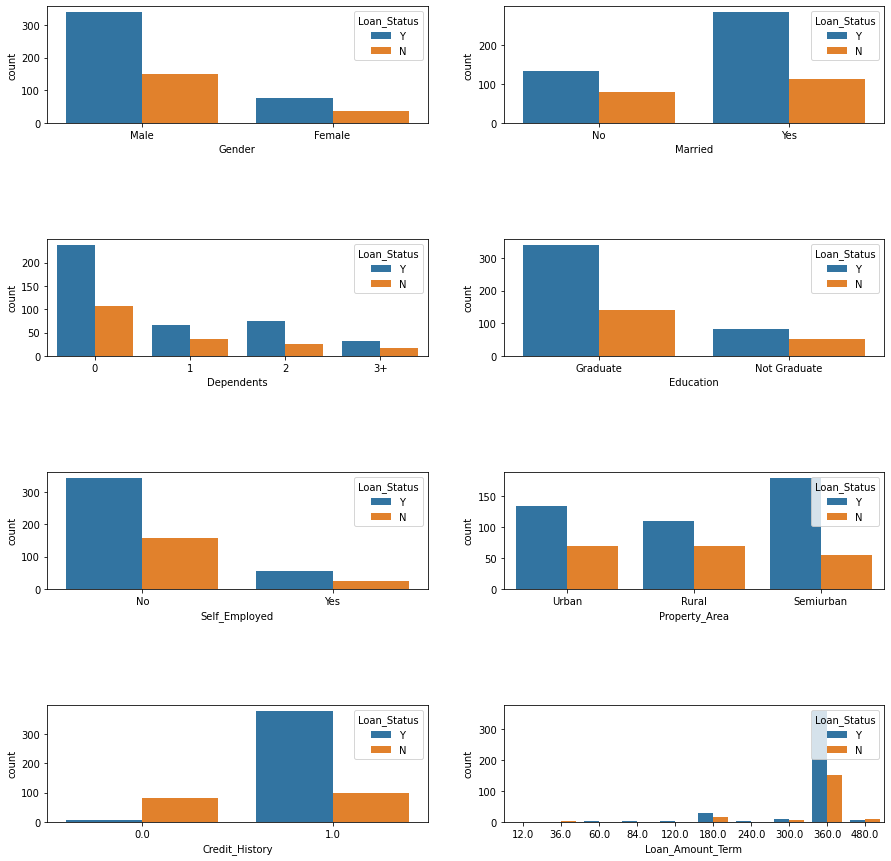

In [39]:
fig,axes = plt.subplots(4,2,figsize=(15,15))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=df,hue='Loan_Status',ax=axes[row,col])
plt.subplots_adjust(hspace=1)

### 3.1.1 Categorical Columns Interpretation ###

Plots above convey following things about the dataset:

1.   Loan Approval Status: About 2/3rd of applicants have been granted loan.
1.   Sex: There are more Men than Women (approx. 3x)
2.   Martial Status: 2/3rd of the population in the dataset is Marred; Married applicants are more likely to be granted loans.
2.   Dependents: Majority of the population have zero dependents and are also likely to accepted for loan.
1.   Education: About 5/6th of the population is Graduate and graduates have higher propotion of loan approval
2.   Employment: 5/6th of population is not self employed.
1.   Property Area: More applicants from Semi-urban and also likely to be granted loans.
2.   Applicant with credit history are far more likely to be accepted.
1.   Loan Amount Term: Majority of the loans taken are for 360 Months (30 years).

### 3.2 Analyse Numerical Columns ###

       ApplicantIncome  CoapplicantIncome  LoanAmount
count       614.000000         614.000000  592.000000
mean       5403.459283        1621.245798  146.412162
std        6109.041673        2926.248369   85.587325
min         150.000000           0.000000    9.000000
25%        2877.500000           0.000000  100.000000
50%        3812.500000        1188.500000  128.000000
75%        5795.000000        2297.250000  168.000000
max       81000.000000       41667.000000  700.000000


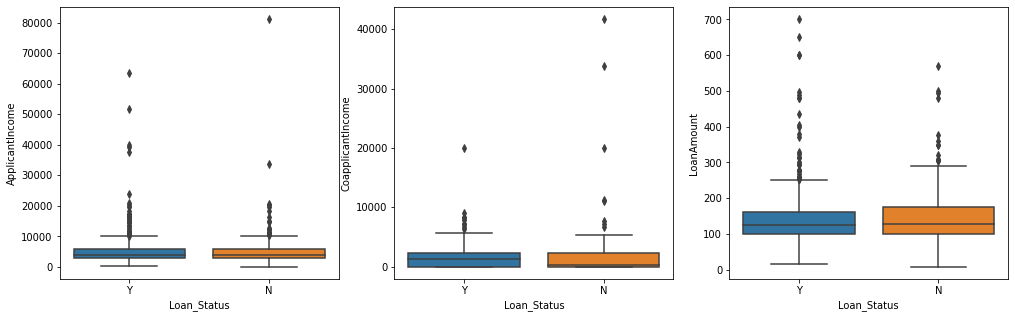

In [40]:
fig,axes = plt.subplots(1,3,figsize=(17,5))
for idx,cat_col in enumerate(numerical_columns):
    sns.boxplot(y=cat_col,data=df,x='Loan_Status',ax=axes[idx])

print(df[numerical_columns].describe())
plt.subplots_adjust(hspace=1)

### 3.2.1 Numerical Columns interpretation ###
For Numercical Columns, there is no significant relation to Loan approval status.

## Loan Status ##
This is a variable we are trying to predict. 

Based on our dataset - we have **422 approved loans** and **192 declined loans**.

In [41]:
# Loan approval rates in absolute numbers
loans_approved = df['Loan_Status'].value_counts()['Y']
loans_declined = df['Loan_Status'].value_counts()['N']
print("Number of loans were approved: ", loans_approved)
print("Number of loans were declined: ", loans_declined)



Number of loans were approved:  422
Number of loans were declined:  192


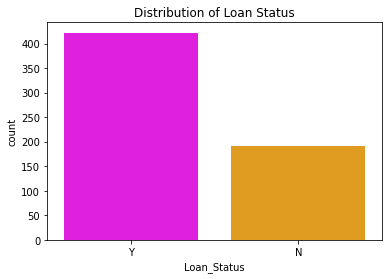

In [42]:
plt.title("Distribution of Loan Status")
sns.countplot(x='Loan_Status',data=df,palette=['magenta','orange']);

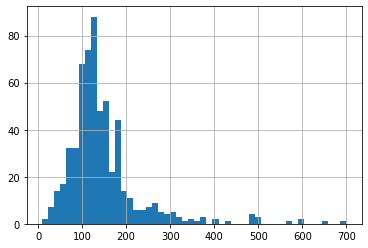

In [43]:
# Histogram of variable LoanAmount
df['LoanAmount'].hist(bins=50)

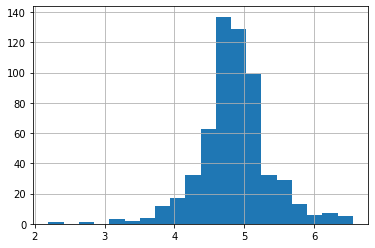

In [44]:
# Perform log transformation of TotalIncome to make it closer to normal
df['LoanAmount_log'] = np.log(df['LoanAmount'])

# Looking at the distribtion of TotalIncome_log
df['LoanAmount_log'].hist(bins=20)

In [45]:
# Get the unique values and their frequency of variable Property_Area
property_area = df['Property_Area'].value_counts()
property_area

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

#### Applicant Income to understand **outliers** ####

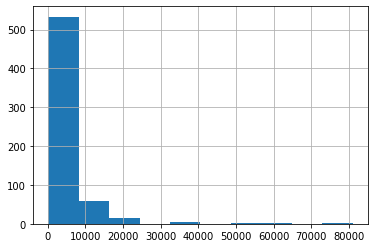

In [46]:
# Histogram of variable ApplicantIncome
df['ApplicantIncome'].hist()

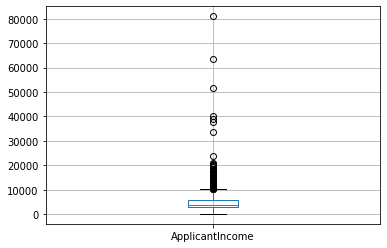

In [47]:
# Box Plot for variable ApplicantIncome of training data set
df.boxplot(column='ApplicantIncome')

The above Box Plot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


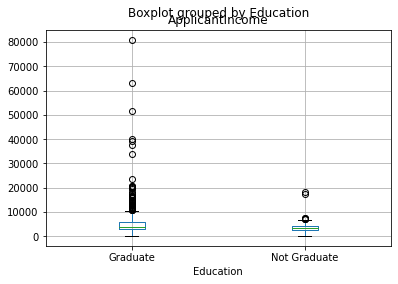

In [48]:
# Box Plot for variable ApplicantIncome by variable Education of training data set
df.boxplot(column='ApplicantIncome', by = 'Education')

We can see that there is no substantial different between the mean income of graduate and non-graduates. But there are a higher number of graduates with very high incomes, which are appearing to be the outliers.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


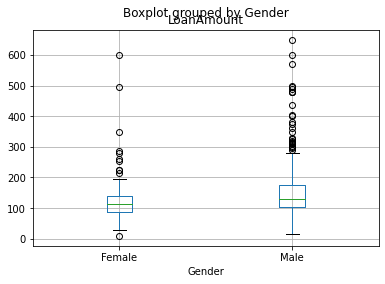

In [49]:
# Box Plot for variable LoanAmount by variable Gender of training data set
df.boxplot(column='LoanAmount', by = 'Gender')

LoanAmount has missing as well as extreme values, while ApplicantIncome has a few extreme values.

### Visualise Credit History ###

In [50]:
# Credit History and Loan Status
pd.crosstab(df ['Credit_History'], df ['Loan_Status'], margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


In [51]:
#Function to output percentage row wise in a cross table
def percentageConvert(ser):
  return ser/float(ser[-1])

# Loan approval rate for customers having Credit_History (1)
credithistory = pd.crosstab(df ["Credit_History"], df ["Loan_Status"], margins=True).apply(percentageConvert, axis=1)
loan_approval_with_credit = credithistory['Y'][1]*100
loan_approval_without_credit = credithistory['Y'][0]*100
print('%.2f percent of the applicants whose loans were approved have Credit History' % loan_approval_with_credit)
print("%.2f percent of the applicants whose loans were approved do not have Credit History" % loan_approval_without_credit)

print(credithistory['Y']);

79.58 percent of the applicants whose loans were approved have Credit History
7.87 percent of the applicants whose loans were approved do not have Credit History
Credit_History
0.0    0.078652
1.0    0.795789
All    0.682624
Name: Y, dtype: float64


# Data Cleaning and Filling Missing Values

# missing values: check where there's missing values & fix accordingly


In [ ]:
df.isnull()

the inline backend is popular for Jupyter Notebooks because it displays the plot in the notebook itself, immediately below the cell that creates the plot

In [53]:
total = df.isnull().sum()

In [ ]:
total

In [55]:
loans_by_gender = df['Gender'].value_counts()
loans_by_gender

Male      489
Female    112
Name: Gender, dtype: int64

Text(0.5, 0, 'Loan_Status')

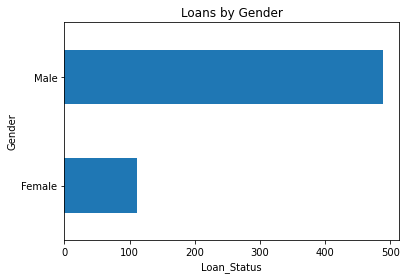

In [56]:
loans_by_gender.sort_values().plot(kind='barh')
plt.title('Loans by Gender')
plt.ylabel('Gender')
plt.xlabel('Loan_Status')

In [57]:
df.Gender = df.Gender.fillna('Male')

In [ ]:
df['Married'].value_counts()

In [59]:
df.Married = df.Married.fillna('Yes')

In [ ]:
df['Dependents'].value_counts()

In [61]:
df.Dependents = df.Dependents.fillna('0')

In [ ]:
df['Self_Employed'].value_counts()

In [63]:
df.Self_Employed = df.Self_Employed.fillna('No')

In [64]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [65]:
df.Loan_Amount_Term = df.Loan_Amount_Term.fillna('360.0')

In [66]:
df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean())

In [67]:
df.LoanAmount.mean()

146.41216216216213

In [68]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [69]:
df.Credit_History = df.Credit_History.fillna('1.0')

In [70]:
total = df.isnull().sum()

In [ ]:
total

# Converting Categorical Values into Numeric Values (Label Encoding):

In [72]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
#var_mod = ['Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
le = LabelEncoder()

for i in var_mod:
    df[i] = le.fit_transform(df[i])

In [ ]:
df.head()

# Model Improvement by eliminating some of the features #

In [74]:
# the iloc indexer for Pandas Dataframe is used for integer-location based indexing / selection by position

x = df.iloc[:,5:12]
y = df.iloc[:,12]


In [75]:
x.head()

,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,5849,0.0,146.412162,360,1,2
1,0,4583,1508.0,128.000000,360,1,0
2,1,3000,0.0,66.000000,360,1,2
3,0,2583,2358.0,120.000000,360,1,2
4,0,6000,0.0,141.000000,360,1,2


In [76]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

# Splitting the Data (into training data set and testing data set):

Here the dataset is split into two parts in a ratio of 80:20 

That is: 80% data will be used for model training and 20% for model testing.

In [77]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20, random_state=0)

In [ ]:
x_test

# Building Decision Tree Model:

Here we create a Decision Tree Model using Scikit-Learn

In [79]:
from sklearn.tree import DecisionTreeClassifier

# create decision tree clasifier object
model = DecisionTreeClassifier()

# train decision tree classifier 
model.fit(x_train,y_train)

# predict the response for test dataset
y_predictions = model.predict(x_test)


# Model Evaluation

Here we evaluate how accurate the Classifier or Model can predict the type of cultivars.

Accuracy can be computed by comparing actual test set values and predicted values.

Model Accuracy is how often is the Classifier correct?

In [80]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score

print("Training Data Set Accuracy: ", accuracy_score(y_test,y_predictions))
print("Training Data F1 Score ", f1_score(y_test,y_predictions))

print("Validation Mean F1 Score: ",cross_val_score(model,x_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(model,x_train,y_train,cv=5,scoring='accuracy').mean())

cnf_matrix = metrics.confusion_matrix(y_test, y_predictions)
print("Confusion Matrix", cnf_matrix)

Training Data Set Accuracy:  0.7235772357723578
Training Data F1 Score  0.7926829268292683
Validation Mean F1 Score:  0.6457117574238872
Validation Mean Accuracy:  0.6843537414965986
Confusion Matrix [[24  9]
 [25 65]]



**Overfitting Problem**

We can see from above metrics that Training Accuracy > Test Accuracy with default settings of Decision Tree classifier. Hence, model is overfit. We will try some Hyper-parameter tuning and see if it helps.

**First let's try tuning 'Max_Depth' of tree**


Accuracy of Decision Tree Model is lower than that of Logistic Regression!

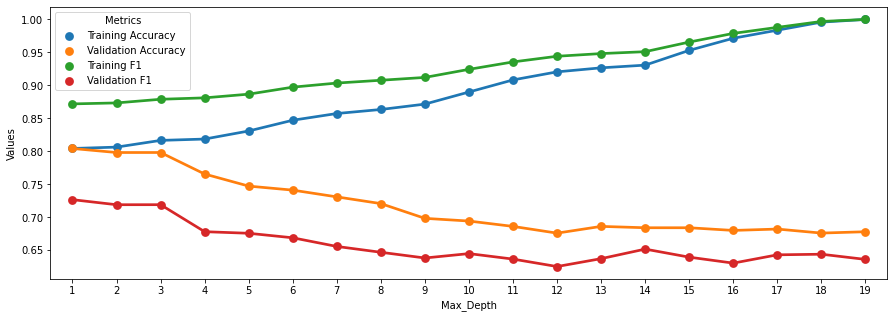

In [81]:
training_accuracy = []
val_accuracy = []
training_f1 = []
val_f1 = []
tree_depths = []

for depth in range(1,20):
    tree_clf = DecisionTreeClassifier(max_depth=depth)
    tree_clf.fit(x_train,y_train)
    y_training_pred = tree_clf.predict(x_train)

    training_acc = accuracy_score(y_train,y_training_pred)
    train_f1 = f1_score(y_train,y_training_pred)
    val_mean_f1 = cross_val_score(tree_clf,x_train,y_train,cv=5,scoring='f1_macro').mean()
    val_mean_accuracy = cross_val_score(tree_clf,x_train,y_train,cv=5,scoring='accuracy').mean()
    
    training_accuracy.append(training_acc)
    val_accuracy.append(val_mean_accuracy)
    training_f1.append(train_f1)
    val_f1.append(val_mean_f1)
    tree_depths.append(depth)
    

Tuning_Max_depth = {"Training Accuracy": training_accuracy, "Validation Accuracy": val_accuracy, "Training F1": training_f1, "Validation F1":val_f1, "Max_Depth": tree_depths }
Tuning_Max_depth_df = pd.DataFrame.from_dict(Tuning_Max_depth)

plot_df = Tuning_Max_depth_df.melt('Max_Depth',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Max_Depth", y="Values",hue="Metrics", data=plot_df,ax=ax)

From above graph, we can conclude that keeping 'Max_Depth' = 3 will yield optimum Test accuracy and F1 score Optimum Test Accuracy ~ 0.805; Optimum F1 Score: ~0.7

In [82]:
from sklearn.metrics import confusion_matrix
tree_clf = DecisionTreeClassifier(max_depth=3,min_samples_leaf = 35)
tree_clf.fit(x_train,y_train)
y_pred = tree_clf.predict(x_test)
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.8292682926829268
Test F1 Score:  0.8934010152284264
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,14,19,33
1,2,88,90
All,16,107,123



**Mis-classifications**

It can be seen that majority of the misclassifications are happening because of **Loan Reject** applicants being classified as ***Accept***.

## Model 2 - Logistic Regression Model ##

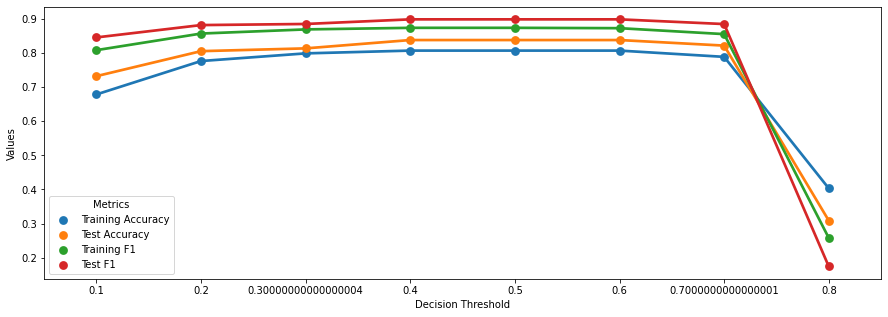

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict

train_accuracies = []
train_f1_scores = []
test_accuracies = []
test_f1_scores = []
thresholds = []

#predictors_Logistic=['Credit_History','Education','Gender']
#x_train = train_modified[list(predictors_Logistic)].values
#y_train = train_modified["Loan_Status"].values
#x_test=test_modified[list(predictors_Logistic)].values

#for thresh in np.linspace(0.1,0.9,8): ## Sweeping from threshold of 0.1 to 0.9
for thresh in np.arange(0.1,0.9,0.1): ## Sweeping from threshold of 0.1 to 0.9
    logreg_clf = LogisticRegression(solver='liblinear')
    logreg_clf.fit(x_train,y_train)
    
    y_pred_train_thresh = logreg_clf.predict_proba(x_train)[:,1]
    y_pred_train = (y_pred_train_thresh > thresh).astype(int)

    train_acc = accuracy_score(y_train,y_pred_train)
    train_f1 = f1_score(y_train,y_pred_train)
    
    y_pred_test_thresh = logreg_clf.predict_proba(x_test)[:,1]
    y_pred_test = (y_pred_test_thresh > thresh).astype(int) 
    
    test_acc = accuracy_score(y_test,y_pred_test)
    test_f1 = f1_score(y_test,y_pred_test)
    
    train_accuracies.append(train_acc)
    train_f1_scores.append(train_f1)
    test_accuracies.append(test_acc)
    test_f1_scores.append(test_f1)
    thresholds.append(thresh)
    
    
Threshold_logreg = {"Training Accuracy": train_accuracies, "Test Accuracy": test_accuracies, "Training F1": train_f1_scores, "Test F1":test_f1_scores, "Decision Threshold": thresholds }
Threshold_logreg_df = pd.DataFrame.from_dict(Threshold_logreg)

plot_df = Threshold_logreg_df.melt('Decision Threshold',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Decision Threshold", y="Values",hue="Metrics", data=plot_df,ax=ax)

Based on the above Test/Train curves, we can keep threshold to 0.4.
Now Finally let's look at Logistic Regression Confusion Matrix

# Model Evaluation using Confusion Matrix and F1 Score #

A confusion matrix is a table that is used to evaluate the performance of a classification model.

You can also visualize the performance of an algorithm. The fundamental of a confusion matrix is the number of correct and incorrect predictions are summed up class-wise.

In [84]:
thresh = 0.5 ### Threshold chosen from above Curves
y_pred_test_thresh = logreg_clf.predict_proba(x_test)[:,1]
y_pred = (y_pred_test_thresh > thresh).astype(int) 
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.8373983739837398
Test F1 Score:  0.8979591836734695
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,15,18,33
1,2,88,90
All,17,106,123


# Building Logistic Regression Model

First we import the Logistic Regression Module and create a Logisctic Regression classifier object using LogisticRegression() function.

Then fit the model on the Training set using fit() function and perform prediction on the Test set using predict() function. 

In [85]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()
logistic_regression.fit(x_train,y_train)
y_predictions = logistic_regression.predict(x_test)


Feature engineering using covariance is sourced from https://towardsdatascience.com/feature-engineering-combination-polynomial-features-3caa4c77a755

In [86]:
x_train.cov()

,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Property_Area
Self_Employed,0.121027,3.253056e+02,-7.446068e+00,4.082424,-0.001654
ApplicantIncome,325.305582,4.434256e+07,-2.018027e+06,327083.355817,-41.788503
CoapplicantIncome,-7.446068,-2.018027e+06,7.769592e+06,56557.222832,9.253903
LoanAmount,4.082424,3.270834e+05,5.655722e+04,7509.602613,-3.186286
Property_Area,-0.001654,-4.178850e+01,9.253903e+00,-3.186286,0.622827


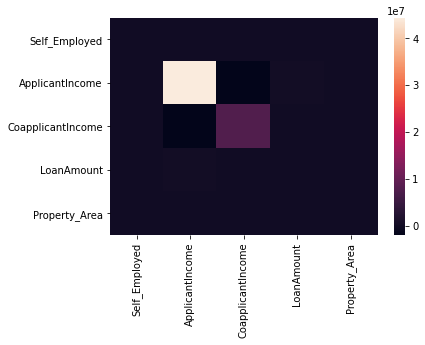

In [87]:
sns.heatmap(x_train.cov())

## Logistic Regression Feature Importance ##

Feature: 0, Score: 0.05074
Feature: 1, Score: 0.00001
Feature: 2, Score: -0.00006
Feature: 3, Score: -0.00147
Feature: 4, Score: -0.00523
Feature: 5, Score: 3.03788
Feature: 6, Score: 0.06116


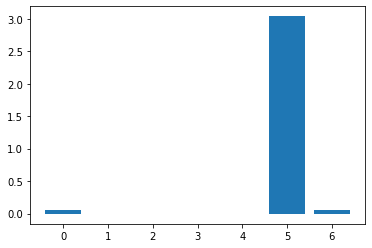

In [88]:
# get importance
importance = logistic_regression.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

# Visualizing Confusion Matrix using Heatmap

Let's visualize the results of the model in the form of a confusion matrix using matplotlib and seaborn.

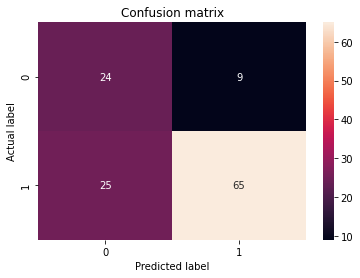

In [89]:
import seaborn as sb

sb.heatmap(cnf_matrix, annot=True)

plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.show()

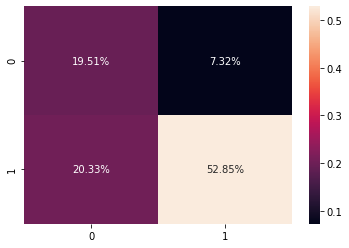

In [90]:
# fmt: string formatting code to use when adding annotations

sb.heatmap(cnf_matrix/np.sum(cnf_matrix), annot=True, fmt='.2%')

# Let's predict whether the Loan will get approved or not for "Michael"

In [91]:
def predictLoanStatus(self_employed, applicant_income, secondary_income, loan_amount, loan_term, credit_history, area): #removed education
    loanstatus = logreg_clf.predict([[self_employed, applicant_income, secondary_income, loan_amount, loan_term, credit_history, area]])
    if (1 in loanstatus):
        print ("Grant the loan to client");
    else :
        print ("Do not grant loan to client");

Perform negative test - client must be declined


In [92]:
predictLoanStatus(0,9346,6500,100,36,0.0,2) # 1 education

Do not grant loan to client


Perform a positive test - client must qualify.

In [93]:
predictLoanStatus(1,7085,0.0,84.0,360,1,1) # 0 education

Grant the loan to client


In [94]:
# END